# VANNILA  AUTOENCODER

In [2]:
from keras.layers import Input,Dense
from keras.models import Model

#this is the size of encoded representations
encoding_dim = 32

#this is our input place holder
input_img = Input(shape=(784,))
#'encoded' is the encoded representation of the input
encoded = Dense(encoding_dim,activation='relu')(input_img)
#'decoded' is the lassy reconstruction of the input
decoded = Dense(784,activation='sigmoid')(encoded)

#this model maps on the input to its reconstruction
autoencoder = Model(input_img,decoded)


Create Encoder Model

In [3]:
#this model maps on to its encoded represntation
encoder = Model(input_img,encoded)

Create Decoder Model

In [4]:
#create a placeholder for encoded input
encoded_input = Input(shape=(encoding_dim,))
#retrieve the last layer of the encoded model
decoded_layer = autoencoder.layers[-1]
#create a decoder odel
decoder = Model(encoded_input,decoded_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

Prepare our Input data

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()

We will normalize all values between 0 and 1 and we will faltten all 28x28 images into vectors of size 784

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Train the Autoencoder

In [8]:
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3844 - val_loss: 0.1902
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1796 - val_loss: 0.1526
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1484 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1315 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1210 - val_loss: 0.1137
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1133 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1079 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1035 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1004 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0979 - val_loss: 0.0954

In [9]:
#encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Display the Results

In [10]:
#!pip install matplotlib

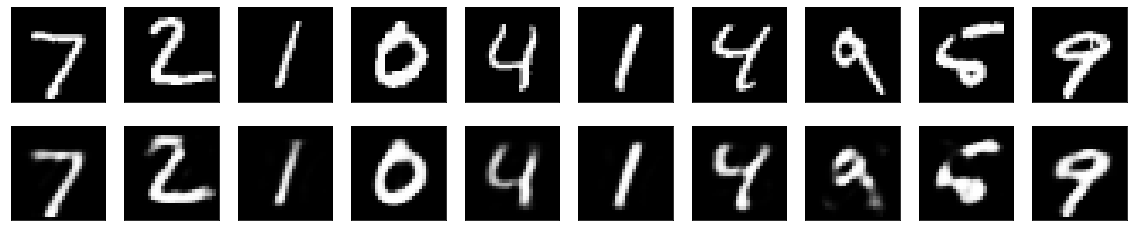

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #number of digits to display
plt.figure(figsize=(20,4))
for i in range(10):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstructed image
    bx = plt.subplot(2,n,i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()    

# SPARSE AUTOENCODER

In [55]:
from keras import regularizers

#this is the size of encoded representations
encoding_dim2 = 32

#this is our input place holder
input_img2 = Input(shape=(784,))
#'encoded' is the encoded representation of the input # add dense layer with L1 activity regularizer
encoded2 = Dense(encoding_dim2,activation='relu',activity_regularizer=regularizers.l1(10e-11))(input_img2)
#'decoded' is the lassy reconstruction of the input
decoded2 = Dense(784,activation='sigmoid')(encoded2)

#this model maps on the input to its reconstruction
autoencoder2 = Model(input_img2,decoded2)

In [56]:
encoder2 = Model(input_img2,encoded2)

#create a placeholder for encoded input
encoded_input2 = Input(shape=(encoding_dim,))
#retrieve the last layer of the encoded model
decoded_layer2 = autoencoder.layers[-1]
#create a decoder odel
decoder2 = Model(encoded_input,decoded_layer(encoded_input))

In [57]:
autoencoder2.compile(optimizer='adam',loss='binary_crossentropy')

In [58]:
from keras.datasets import mnist
import numpy as np
(x_train2, _),(x_test2, _) = mnist.load_data()

In [59]:
x_train2 = x_train2.astype('float32') / 255.
x_test2 = x_test2.astype('float32') / 255.
x_train2 = x_train2.reshape((len(x_train2),np.prod(x_train2.shape[1:])))
x_test2 = x_test2.reshape((len(x_test2),np.prod(x_test2.shape[1:])))
print(x_train2.shape)
print(x_test2.shape)

(60000, 784)
(10000, 784)


In [60]:
autoencoder2.fit(x_train2,x_train2, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test2,x_test2))

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3814 - val_loss: 0.1926
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1819 - val_loss: 0.1536
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1495 - val_loss: 0.1339
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1318 - val_loss: 0.1215
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1207 - val_loss: 0.1131
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1128 - val_loss: 0.1072
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1075 - val_loss: 0.1029
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1036 - val_loss: 0.0997
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1004 - val_loss: 0.0972
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0979 - val_lo

235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0915
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0923 - val_loss: 0.0915
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0922 - val_loss: 0.0914
Epoch 86/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0915
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0914
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0914
Epoch 89/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0923 - val_loss: 0.0914
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 

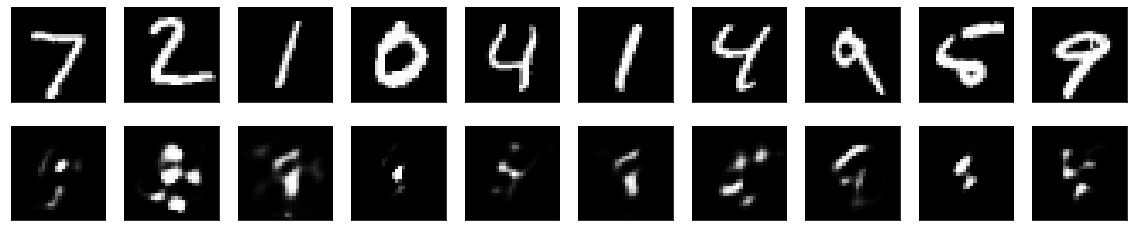

In [61]:
encoded_imgs2 = encoder2.predict(x_test2)
decoded_imgs2 = decoder2.predict(encoded_imgs2)

import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #number of digits to display
plt.figure(figsize=(20,4))
for i in range(10):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test2[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstructed image
    bx = plt.subplot(2,n,i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28,28))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()    

# DENOISING AUTOENCODER

Create and Display noisy image

In [21]:
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),28,28,1))
x_test = x_test.reshape((len(x_test),28,28,1))

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)       #Clipping the values between 0 and 1                 
x_test_noisy = np.clip(x_test_noisy,0.,1.)                        

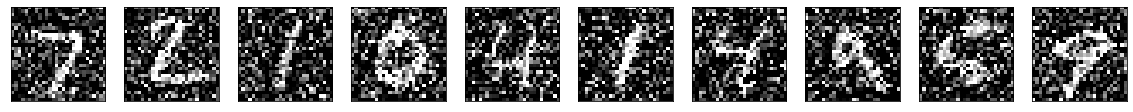

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #number of digits to display
plt.figure(figsize=(20,4))
for i in range(10):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    

Configure the autoencoder

In [23]:
import tensorflow as tf

input_img = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# the representation is (7, 7, 32)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x) # here u are upsampling the(7,7)  feature map to (14,14) feature map
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x) #here u are upsampling the(14,14)  feature map to (28,28) feature map
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)

In [26]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Train The autoencoder

In [27]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True,validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 56s 119ms/step - loss: 0.2467 - val_loss: 0.1141
Epoch 2/10
469/469 [==============================] - 56s 119ms/step - loss: 0.1129 - val_loss: 0.1069
Epoch 3/10
469/469 [==============================] - 53s 114ms/step - loss: 0.1070 - val_loss: 0.1038
Epoch 4/10
469/469 [==============================] - 53s 112ms/step - loss: 0.1044 - val_loss: 0.1022
Epoch 5/10
469/469 [==============================] - 53s 113ms/step - loss: 0.1025 - val_loss: 0.1007
Epoch 6/10
469/469 [==============================] - 53s 113ms/step - loss: 0.1011 - val_loss: 0.0995
Epoch 7/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1001 - val_loss: 0.0986
Epoch 8/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0993 - val_loss: 0.0984
Epoch 9/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0984 - val_loss: 0.0973
Epoch 10/10
469/469 [==============================] - 53s 113ms/step - l

In [30]:
decoded_imgs = autoencoder.predict(x_test)

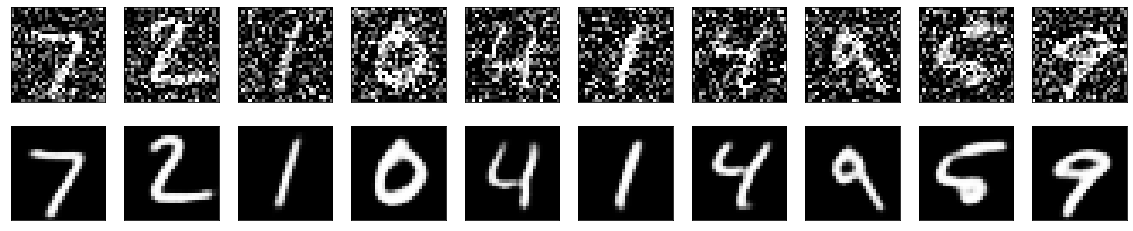

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #number of digits to display
plt.figure(figsize=(20,4))
for i in range(10):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstructed image
    bx = plt.subplot(2,n,i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()    